<a href="https://colab.research.google.com/github/shivamrahane/Airbnb-dataset-analysis-PandasSql-shivam-kumar/blob/main/Airbnb_dataset_analysis_(PandasSql)_shivam_kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb dataset analysis (PandasSql)



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name-** Shivam kumar


# **Project Summary -**

In this project, we conducted Exploratory Data Analysis (EDA) on an Airbnb dataset using PandasSQL, a library that allows us to run SQL queries within Pandas. The objective was to analyze the dataset, extract meaningful insights, and identify key trends in Airbnb listings.

The dataset contains various details about Airbnb listings, including unique identifiers for each listing and host, location details such as neighbourhood and geographical coordinates, room type, price per night, minimum nights required for booking, and the number of reviews. Additionally, it includes information about the host’s activity, such as the total number of listings they manage and the availability of rooms throughout the year.

Before analysis, data cleaning and preprocessing were performed to ensure accuracy. We checked for missing values in columns like name, host_name, and reviews_per_month and handled them by either filling in relevant data or removing unnecessary records. Duplicate entries were also examined and removed. Data types were corrected where needed, such as converting price into numerical format and date-related columns into proper date-time format to extract insights on booking trends.

Using SQL queries in PandasSQL, we explored different aspects of the dataset. Price distribution analysis helped identify the typical range of listing prices and detect outliers with extremely high prices. Neighbourhood analysis revealed which areas had the most Airbnb listings and how prices varied across different locations. Some neighbourhoods had significantly higher average prices, indicating they were premium locations.

We also analyzed the distribution of room types. The majority of listings were private rooms and entire homes, with entire homes generally priced higher. Host activity was another important factor, as some hosts managed multiple listings, while others had only one. Understanding these patterns helped in identifying large-scale hosts versus individual property owners.

Booking trends were examined by analyzing the minimum_nights column, which revealed the average length of stay for guests. Some listings required extended stays, which could impact their demand. Review patterns provided insights into listing popularity, as properties with higher reviews were generally more in demand. The number of reviews per month helped differentiate between actively booked listings and those with fewer guest interactions.

Overall, this EDA provided valuable insights into the Airbnb market by identifying trends in pricing, location preferences, room types, and host activity. Using PandasSQL allowed for efficient data querying and analysis. The findings can help Airbnb hosts optimize their listings and assist travelers in making informed accommodation choices.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The goal of this EDA project is to analyze an Airbnb dataset to gain insights into various aspects of the accommodations listed on the platform. We aim to explore patterns and trends in the data, such as the distribution of room types, pricing strategies, and the relationship between location and rental prices. By examining the dataset, which includes information about properties like their location, price, number of reviews, and host details, we will identify key factors that influence property performance and availability. This analysis will help in understanding the dataset's structure, uncovering potential issues such as missing or inconsistent data, and ultimately providing actionable insights that can inform decisions or further analysis related to Airbnb rentals.

#### **Define Your Business Objective?**

To identify key factors that influence Airbnb rental prices and property performance to optimize pricing strategies and improve property listing.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
!pip install pandas pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=3a90b8941c6efdccc012342e5ba76969ac168d35b9d93266d09a3ea2d48da68d
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [3]:
# Import Libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf



### Dataset Loading

In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Data science/datasets/EDA datasets/Copy of Airbnb NYC 2019.csv',)     #


### Dataset First View

In [5]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
conn = sqlite3.connect('Airbnb.db')
df.to_sql('Airbnb',conn,if_exists='replace',index=False)

conn.close()

In [7]:
conn = sqlite3.connect('Airbnb.db')
conn.commit()
users = pd.read_sql_query('SELECT * FROM Airbnb',conn)


In [8]:
pd.read_sql_query('''

select * from Airbnb

''',conn)



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,None,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,None,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,None,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,None,NaN,6,2


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

this dataset has 48895 rows and 16 columns

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

there is no duplicate values in the dataset

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


reviews_per_month and last_review has the most missing values 10052 each

<Axes: >

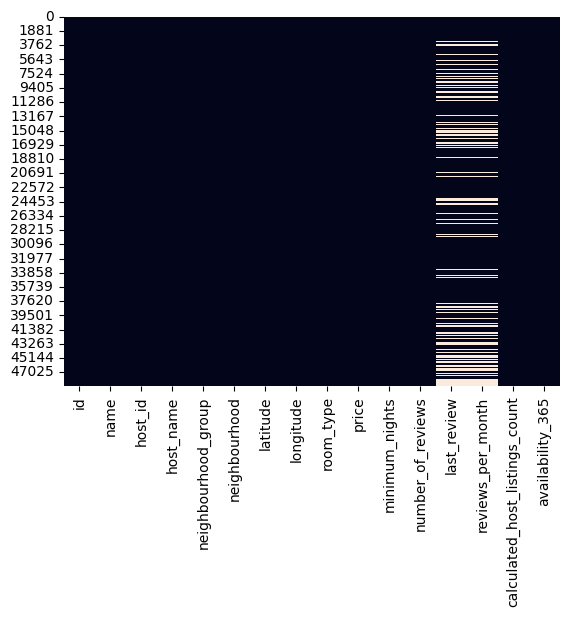

In [13]:
# Visualizing the missing values
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The given dataset is a dataset from housing industry:- Airbnb, and we have to analyse the relationship between the various factors contributing to this housing compony accomodation and the gets insights from it.

THe aim is to explore patterns and trends in the data, such as the distribution of room types, pricing strategies, and the relationship between location and rental prices. By examining the dataset, which includes information about properties like their location, price, number of reviews, and host details, we will identify key factors that influence property performance and availability.

The above dataset has 48895 rows and 16 columns. There are some mising values in the column ("name","host_name","last_reviews","reviews per month") in the dataset and no duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [33]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [34]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description



*   id: unique no given to each name
*   host_id:unique no given to each host
*   name: brand representing the  room
*   host_name: hist name for the respective room
*   neighbourhood_group: represents the neighbourhood group which it belongs
*   neighbourhood: represents its neighbourhood
*   lattitude: geographical lattitudal location for the room
*   longitude: geographical longitudal location for the room
*   room_type: represents types of the room ..either private, shared or entire home
*   price: price per night for a room
*   minimum_nights: least no of nights that should be rented
*   number_of_reviews: total no of reviews for a room
*   last_reviews:date at which the last review was given
*   reviews_per_month: average reviews per month for rach host's room
*   calculated_host_listings_count: total no of host that a particular room company has
*  availability_365:no of days it is available in a year















### Check Unique Values for each variable.

In [35]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [46]:
# Write your code to make your dataset analysis ready.
# creating a copy of the dataset
newdf=df.copy()


In [47]:
# Rename columns for consistency or clarity
newdf.rename(columns={
    'lattitude': 'latitude',
    'no_of_reviews': 'number_of_reviews',
    'last_reviews': 'last_review date',
    'minimum_nights': 'minimum_nights',
}, inplace=True)


In [48]:
newdf.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [49]:
#filtering cheap properties
cheap_properties = newdf[newdf['price'] < 100] #properties with less than 100 per night
cheap_properties.shape

(21877, 16)

In [50]:
cheap_properties.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


In [51]:
sorted_cheap_properties = cheap_properties.sort_values(by='price', ascending=False)
sorted_cheap_properties.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
69,16821,Large Room in Amazing East Village Apt,4396,Casey,Manhattan,East Village,40.72298,-73.98474,Private room,99,1,106,2019-06-21,1.26,2,336
238,60680,The gem of the East Village,292630,Mich,Manhattan,East Village,40.72654,-73.98049,Entire home/apt,99,2,127,2019-06-20,1.22,1,320
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
257,63360,Safe cute near subway& Manhattan NY NY retro s...,307962,Dennis & Naoko,Queens,Astoria,40.75384,-73.91433,Entire home/apt,99,5,441,2019-06-24,4.50,1,226
43195,33509538,WALK TO FREE SI FERRY FROM FURNISHED STUDIO APT,160956,Neil,Staten Island,St. George,40.64015,-74.08127,Entire home/apt,99,3,4,2019-06-28,2.31,1,326


In [52]:
# Filter properties in a specific neighborhood
neighborhood_properties = df[df['neighbourhood'] == 'Maspeth']
neighborhood_properties.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2827,1586454,Private Room With Patio In Queens,8452695,Macit,Queens,Maspeth,40.73732,-73.90168,Private room,48,20,33,2019-04-21,0.46,2,297
2828,1586576,Private Bedroom in QUEENS,8452695,Macit,Queens,Maspeth,40.74033,-73.89921,Private room,56,28,14,2017-04-15,0.20,2,310
2927,1691188,4 bedroom 2Bath apt Maspeth Queens,8934751,Mike,Queens,Maspeth,40.72509,-73.89687,Entire home/apt,200,4,24,2019-06-01,0.38,2,157
3538,2110493,PRIVATE studio/not shared/ SAFE/ CLEAN/Affordable,1834769,Debbie,Queens,Maspeth,40.72675,-73.90522,Entire home/apt,64,3,7,2019-06-22,0.69,1,333
4119,2651810,Quiet Queens Apt in middle of NYC,13574223,Jimmy,Queens,Maspeth,40.71827,-73.90647,Entire home/apt,80,2,61,2019-06-16,3.13,1,32


In [53]:
newdf['last_review'] = pd.to_datetime(newdf['last_review'], format='%Y-%m-%d')

# Extract year from 'last_review'
newdf['review_year'] = newdf['last_review'].dt.year
newdf.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'review_year'],
      dtype='object')

In [54]:
# Set 'id' as the index
newdf.set_index('id', inplace=True)
newdf


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_year
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,NaN
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,NaN
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,NaN


In [55]:
newdf.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'review_year'],
      dtype='object')

In [58]:
#Removing Listings with Zero or Unreasonably High Prices
newdf = newdf[(newdf['price'] > 0) & (newdf['price'] < newdf['price'].quantile(0.99))]


This removes free listings and outliers in the top 1% of prices

In [61]:
#Listings with high availability and reviews are likely to be in demand.
newdf['high_demand'] = (newdf['availability_365'] > 200) & (newdf['number_of_reviews'] > 30)
newdf.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_year,high_demand
id,,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,False
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,True
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,False
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,False
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,False


This helps in identifying popular listings.

In [62]:
#How Long days gap Since the Last Review
newdf['days_since_last_review'] = (pd.to_datetime('today') - newdf['last_review']).dt.days
newdf.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_year,high_demand,days_since_last_review
id,,,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,False,2305.0
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,True,2091.0
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,False,NaN
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,False,2046.0
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,False,2274.0


This helps in finding inactive listings

In [64]:
#Creating a New Column for Long-Term vs. Short-Term Stays
newdf['stay_type'] = newdf['minimum_nights'].apply(lambda x: 'Short-term' if x <= 7 else 'Long-term')


This helps in visualizing the ratio of short-term vs. long-term stays.

In [66]:
# Extracting Month and Quarter from last_review
newdf['review_month'] = newdf['last_review'].dt.month
newdf['review_quarter'] = newdf['last_review'].dt.quarter
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47288 entries, 2539 to 36487245
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            47272 non-null  object        
 1   host_id                         47288 non-null  int64         
 2   host_name                       47267 non-null  object        
 3   neighbourhood_group             47288 non-null  object        
 4   neighbourhood                   47288 non-null  object        
 5   latitude                        47288 non-null  float64       
 6   longitude                       47288 non-null  float64       
 7   room_type                       47288 non-null  object        
 8   price                           47288 non-null  int64         
 9   minimum_nights                  47288 non-null  int64         
 10  number_of_reviews               47288 non-null  int64         
 11  l

this will help to visualize reviews peak throughout the year.

In [67]:
#finding Highly Competitive Areas Based on Listing Density
neighborhood_counts = newdf['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'total_listings']
newdf = newdf.merge(neighborhood_counts, on='neighbourhood', how='left')


this will help to visualize competitive hotspots for Airbnb listings.

In [69]:
newdf.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,review_year,high_demand,days_since_last_review,stay_type,review_month,review_quarter,total_listings
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,...,0.21,6,365,2018.0,False,2305.0,Short-term,10.0,4.0,173
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,...,0.38,2,355,2019.0,True,2091.0,Short-term,5.0,2.0,1324
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,...,NaN,1,365,NaN,False,NaN,Short-term,NaN,NaN,2618
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,...,4.64,1,194,2019.0,False,2046.0,Short-term,7.0,3.0,550
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,...,0.10,1,0,2018.0,False,2274.0,Long-term,11.0,4.0,1103


### What all manipulations have you done and insights you found?

**1. Data Cleaning and Standardization**






*   Created a copy of the original dataset to avoid accidental modifications.
*   Renamed columns for clarity, such as correcting spelling errors (lattitude → latitude, no_of_reviews → number_of_reviews).
*   Converted last_review into datetime format to facilitate time-based analysis.
*  Set id as the index for easy data referencing.


**2. Handling Missing and Inconsistent Data**


*  Checked for missing values and handled them appropriately.
* Removed or filtered out listings with zero or unrealistic prices (e.g., extreme outliers above the 99th percentile)


**3. Feature Engineering for Better Analysis**

Created new columns to extract useful insights:


*  review_year: Extracted from last_review to analyze review trends over time.
*   review_month: Extracted the month number of the last review to identify review patterns.
*   stay_type: Categorized listings into short-term stays (≤7 nights) and long-term stays (>7 nights).
*  high_demand: Flagged listings with high availability (>200 days) and high reviews (>30) to identify popular properties.
*  days_since_last_review: Flagged properties that are frequently booked and have recent reviews.
*   Created a listing density measure to detect highly competitive areas with a large number of listings.













## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 :-Bar chart on Average Price by Room Type

In [70]:
newdf["room_type"]

,room_type
0,Private room
1,Entire home/apt
2,Private room
3,Entire home/apt
4,Entire home/apt
...,...
47283,Private room
47284,Private room
47285,Entire home/apt
47286,Shared room


In [84]:
# Chart - 1 visualization code
x = pd.read_sql_query('''

SELECT room_type, AVG(price) AS avg_price
FROM Airbnb
GROUP BY room_type;

''',conn)
x


,room_type,avg_price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


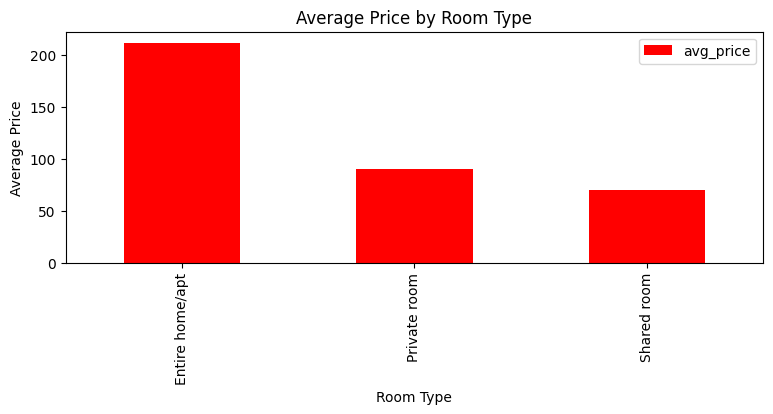

In [85]:
plt.rcParams['figure.figsize'] = (9, 3)
x.plot(kind='bar', color='r', x='room_type', y='avg_price')

plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

I chose bar plot for visualizing the average price by room type because it clearly shows how different categories compare against each other. Here, the categories are the different room types (e.g., private rooms, shared rooms, entire homes), and the bar plot allows us to see the average price for each type in a straightforward way. The length of each bar directly represents the average price, making it easy to compare the relative prices of different room types at a glance. This visual representation helps quickly identify trends and differences, which is useful for making informed decisions about pricing strategies.

##### 2. What is/are the insight(s) found from the chart?

The bar plot shows the average price for each room type, making it easy to see which room types are more expensive on average. From this visualization,i found that people chose more for entire home type room rather than shared or private type rooms. . This insight helps in understanding pricing trends and making decisions about pricing adjustments or marketing strategies

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, here can be a negative impact . For example, the average price for (like shared rooms types is significantly lower compared to entire home types room, it might suggest that these rooms are undervalued or less profitable. This could lead to negative growth if the pricing strategy isn't adjusted to better reflect their value or attract more guests.

#### Chart - 2 :- Distribution of Room Types (Pie Chart)

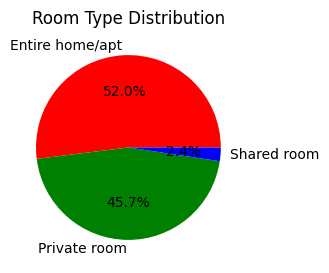

In [87]:
x = pd.read_sql_query('''
SELECT room_type, COUNT(*) AS count
FROM Airbnb
GROUP BY room_type;
''', conn)

plt.pie(x['count'], labels=x['room_type'], autopct='%1.1f%%', colors=['r', 'g', 'b', 'y'])
plt.title('Room Type Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pie chart because it is the best way to show the proportion of different room types in the dataset. Since we are dealing with categories (room types) and their counts, a pie chart makes it easy to compare their sizes visually. The percentages on the chart help understand which room type is the most or least common at a quick glance

##### 2. What is/are the insight(s) found from the chart?

From the pie chart showing the count of various room types, I can see the proportion of each room type within the dataset. For example, the pie chart shows that 'Entire home/apt' takes up the largest slice, it indicates that this room type is the most common among the listings. The 'Shared room' has a smaller slice, it means there are fewer of these types of rooms. This visual representation helps in understanding the distribution of room types, which can provide insights into the variety of accommodations available and guide decisions on market trends or property management strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

here, the pie chart reveals a heavy concentration of listings in a single room type, such as "Entire home/apt," it indicate an oversupply in that category. This could lead to increased competition among hosts, potentially driving down prices and affecting profitability. And also there are fewer listings for other room type, like "Shared room". it suggests missed opportunities to attract different customer segments. This imbalance can make the market less flexible and reduce the overall appeal of the platform. Hosts may face lower occupancy rates and decreased revenue if they cannot adapt to changing market demands or competition from more varied listings.

#### Chart - 3 :-Number of Listings per Neighborhood (Bar Chart)

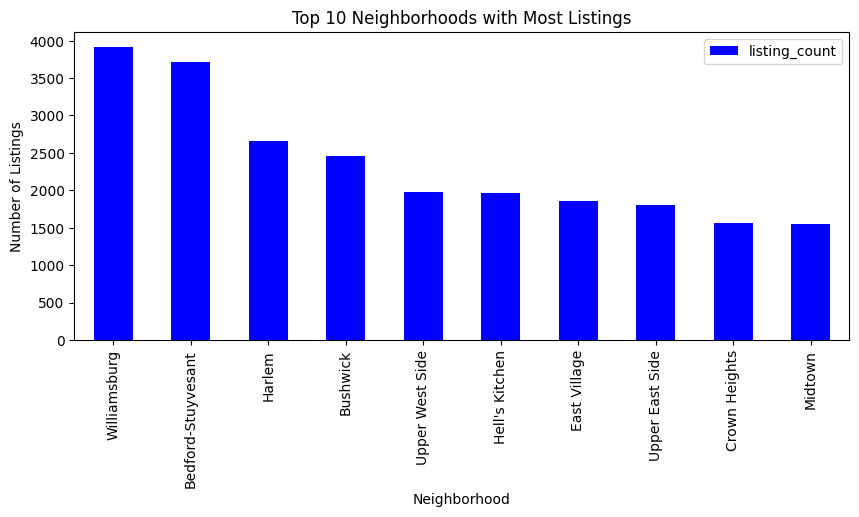

In [88]:
# Chart - 3 visualization code
x = pd.read_sql_query('''
SELECT neighbourhood, COUNT(*) AS listing_count
FROM Airbnb
GROUP BY neighbourhood
ORDER BY listing_count DESC
LIMIT 10;
''', conn)

plt.rcParams['figure.figsize'] = (10, 4)
x.plot(kind='bar', color='b', x='neighbourhood', y='listing_count')

plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Top 10 Neighborhoods with Most Listings')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it is the best way to compare the number of listings across different neighborhoods. Since we are focusing on the top 10 neighborhoods, a bar chart makes it easy to see which areas have the most Airbnb listings. The bars help in quickly identifying which neighborhoods are the most popular for Airbnb rentals

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows the top 10 neighborhoods with the most Airbnb listings. This helps us understand which areas are the most popular for Airbnb rentals. neighborhoods like williumburg and B-studyvesant have a much higher number of listings, it means they are hotspots for Airbnb activity. This insight can help hosts decide where to list their property and travelers choose popular areas to stay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can create a positive business impact by helping hosts and investors understand which neighborhoods have the highest demand for Airbnb listings. If a neighborhood has many listings, it indicates strong interest from travelers, making it a good location for new Airbnb properties. Additionally, knowing the most popular room types can help hosts set competitive pricing and improve booking rates.

#### Chart - 4 :-Price Distribution (Histogram)

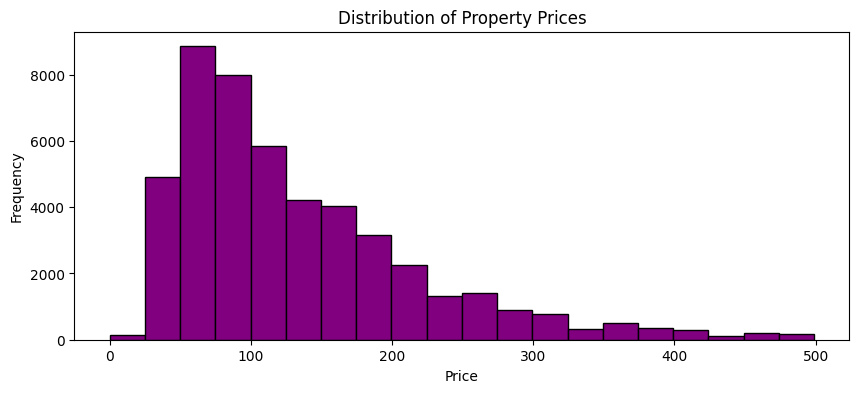

In [89]:
# Chart - 4 visualization code
x = pd.read_sql_query('''
SELECT price FROM Airbnb WHERE price < 500;
''', conn)

plt.hist(x['price'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a histogram because it is the best way to show how property prices are distributed. It helps us see which price ranges are most common and whether the prices are evenly spread or skewed towards lower or higher values. The bars make it easy to identify patterns like whether most properties are affordable or expensive

##### 2. What is/are the insight(s) found from the chart?

The histogram shows how property prices are spread out. It helps us see the most listings are affordable or if there are many high-priced properties. the bars are higher on the lower end, it means most properties are budget-friendly. This insight helps hosts set competitive prices and helps guests find listings that fit their budget

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can have a positive business impact by helping hosts price their properties competitively. If most properties fall within a certain price range, new hosts can set their prices accordingly to attract more bookings. It also helps travelers understand the average cost of stays in different areas, making it easier for them to find options within their budget.

#### Chart - 5 :-Average Price by Neighborhood Group (Bar Chart)

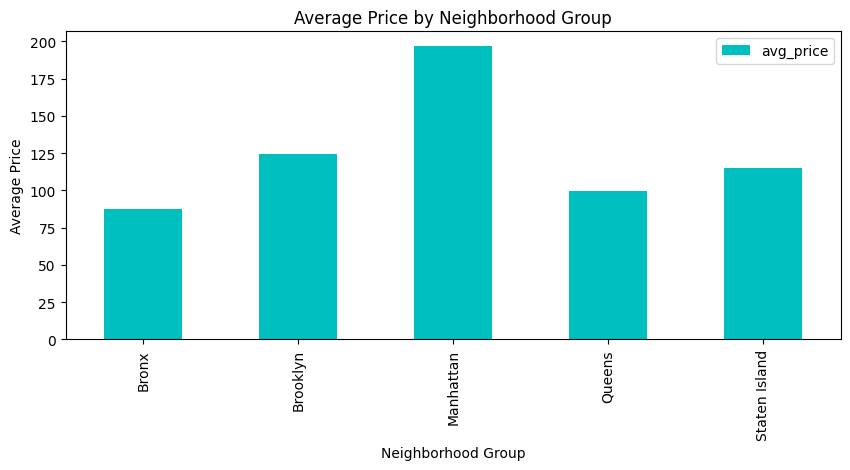

In [90]:
# Chart - 5 visualization code
x = pd.read_sql_query('''
SELECT neighbourhood_group, AVG(price) AS avg_price
FROM Airbnb
GROUP BY neighbourhood_group;
''', conn)

x.plot(kind='bar', color='c', x='neighbourhood_group', y='avg_price')

plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood Group')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it is the best way to compare the average price across different neighborhood groups. Since we are looking at categories (neighborhood groups) and their average prices, a bar chart makes it easy to see which areas are more expensive and which are more affordable at a glance

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows the average price in each neighborhood group. It helps us see which areas have higher or lower prices. a neighborhoods like manhattan have much higher prices, it means they are premium locations, while lower-priced areas might be more budget-friendly. This insight helps hosts set competitive prices and travelers choose stays based on their budget

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact by helping hosts price their listings based on the average price in their neighborhood group. If they see that their area's prices are high, they can set premium rates and offer better services to attract high-paying guests. If their area has lower prices, they can focus on affordable stays to attract budget travelers.

#### Chart - 6 :_ Availability of Listings Over the Year (Line Chart)

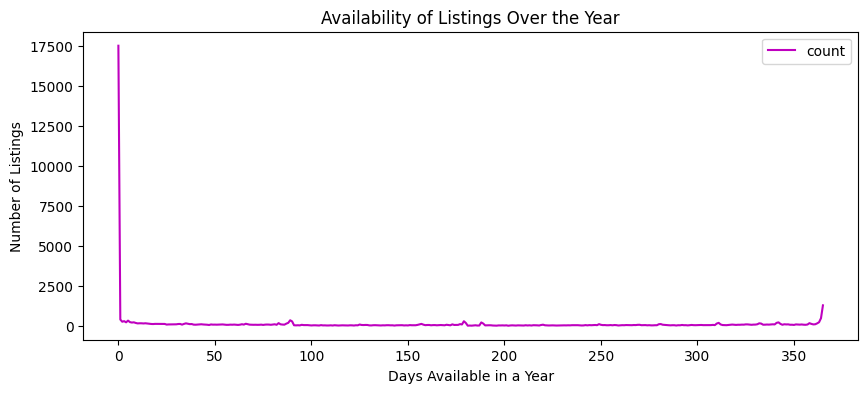

In [91]:
# Chart - 6 visualization code
x = pd.read_sql_query('''
SELECT availability_365, COUNT(*) AS count
FROM Airbnb
GROUP BY availability_365
ORDER BY availability_365;
''', conn)

x.plot(kind='line', color='m', x='availability_365', y='count')

plt.xlabel('Days Available in a Year')
plt.ylabel('Number of Listings')
plt.title('Availability of Listings Over the Year')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line chart because it helps show trends in how many days listings are available throughout the year. Since availability is a continuous variable, a line chart makes it easy to see patterns and fluctuations in the number of listings that are available for different durations. This helps in understanding whether most listings are available year-round or only for a few days

##### 2. What is/are the insight(s) found from the chart?

The line chart shows how many listings are available for different numbers of days in a year. It helps us see if most listings are available year-round or only for a limited time.  the chart has a peak at 2-7 days, it means many hosts does not keep their properties available all year.  there are peaks at lower values, it suggests some listings are seasonal or used only occasionally for Airbnb. This insight helps in understanding market availability trends

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can have a positive business impact by helping hosts and investors understand listing availability trends. If many properties are available year-round, it means there is consistent competition, and hosts may need to offer competitive pricing and better services to attract guests. If many listings are seasonal, it could indicate high demand during certain months, helping hosts adjust prices during peak seasons to maximize earnings.

#### Chart - 7 :-Total Listings by Host (Bar Chart)

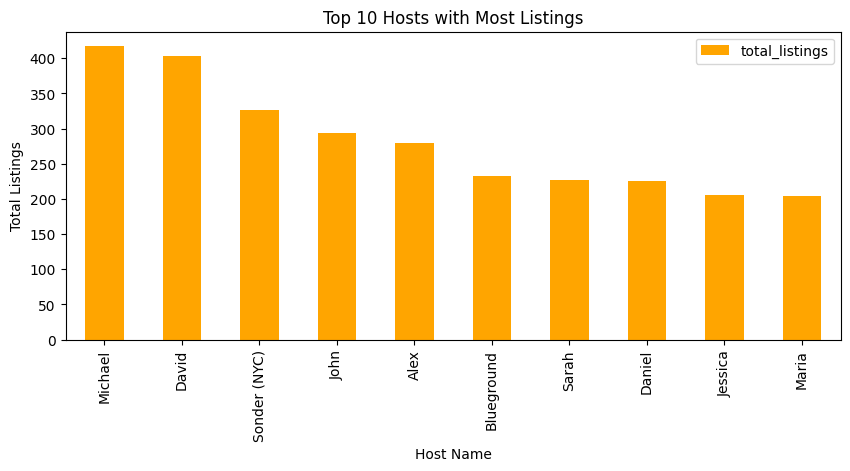

In [92]:
# Chart - 7 visualization code
x = pd.read_sql_query('''
SELECT host_name, COUNT(*) AS total_listings
FROM Airbnb
GROUP BY host_name
ORDER BY total_listings DESC
LIMIT 10;
''', conn)

x.plot(kind='bar', color='orange', x='host_name', y='total_listings')

plt.xlabel('Host Name')
plt.ylabel('Total Listings')
plt.title('Top 10 Hosts with Most Listings')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it is the best way to compare the top 10 hosts based on their total listings. Since we are dealing with categories (host names) and their listing counts, a bar chart makes it easy to see which hosts have the most properties at a glance. It helps identify major players in the Airbnb market

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows the top 10 hosts with the most listings on Airbnb. It helps us see which hosts own multiple properties and dominate the market. here ,  a few hosts have a large number of listings, it suggests that some hosts run Airbnb as a business rather than just renting out a single property. This insight helps in understanding the distribution of listings among different hosts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact by helping Airbnb and new hosts understand the market structure. If a few hosts own many properties, it means they are running Airbnb as a business, which can improve service quality and availability. New hosts can learn from them and apply similar strategies to grow their listings.

#### Chart - 8:-Scatter Plot - Price vs. Number of Reviews

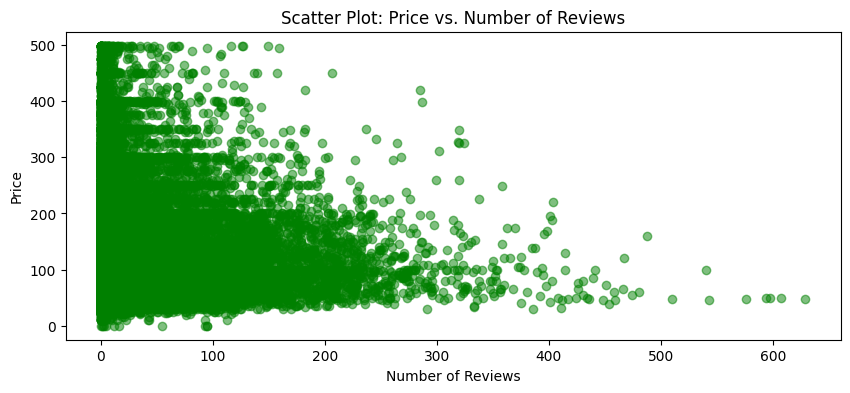

In [94]:
# Chart - 8 visualization code
x = pd.read_sql_query('''
SELECT price, number_of_reviews FROM Airbnb WHERE price < 500;
''', conn)

plt.scatter(x['number_of_reviews'], x['price'], alpha=0.5, color='green')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs. Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot because it helps show the relationship between price and the number of reviews. Since both are continuous variables, a scatter plot makes it easy to see if higher-priced listings get more or fewer reviews. It also helps identify trends, outliers, or clusters in the data

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows how price and the number of reviews are related. there is a clear pattern, it means that price influences how many reviews a listing gets. The cheaper listings have more reviews, it could mean they are more popular among guests. If there is no clear trend, it suggests that price and reviews are not strongly connected. The chart also helps identify outliers, like expensive listings with very few reviews

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact by showing how price affects customer engagement. If lower-priced listings get more reviews, hosts might consider competitive pricing to attract more guests and improve their ratings. It also helps Airbnb recommend pricing strategies based on customer behavior.

#### Chart - 9:-Bubble Chart - Price vs. Availability

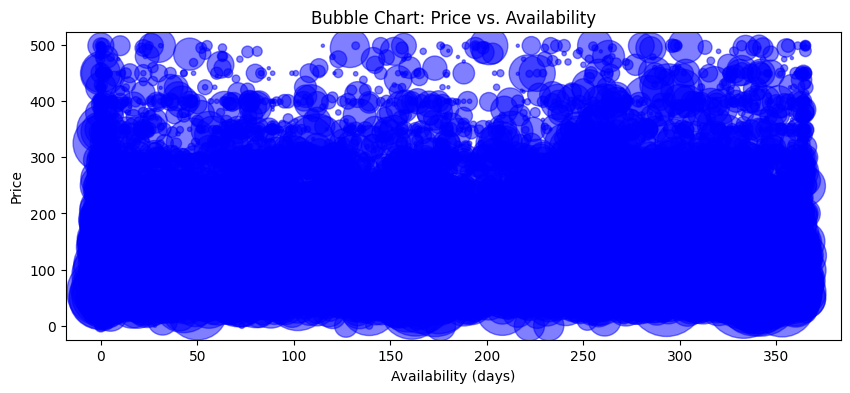

In [95]:
# Chart - 9 visualization code
x = pd.read_sql_query('''
SELECT price, availability_365, number_of_reviews
FROM Airbnb
WHERE price < 500;
''', conn)

plt.scatter(x['availability_365'], x['price'], s=x['number_of_reviews']*5, alpha=0.5, color='blue')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.title('Bubble Chart: Price vs. Availability')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bubble chart because it helps show the relationship between price and availability while also adding the number of reviews as an extra factor. The size of the bubbles represents how many reviews a listing has, making it easy to see which properties are more popular. This chart helps in understanding how availability and price impact customer interest

##### 2. What is/are the insight(s) found from the chart?

The bubble chart shows how price and availability are related while also considering the number of reviews. the lower-priced listings have higher availability and more reviews, it means they are in high demand. some listings are available all year but have few reviews, it might indicate low customer interest. The chart also helps identify which price ranges attract the most guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact by guiding hosts on pricing and availability strategies. If listings with moderate prices and high availability get more reviews, hosts can adjust their pricing and open more dates to attract guests. Airbnb can also use this data to recommend pricing based on demand.

#### Chart - 10:-Donut Chart - Room Type Distribution

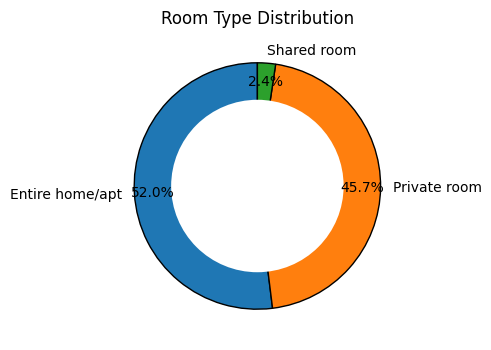

In [97]:
# Chart - 10 visualization code
x = pd.read_sql_query('''
SELECT room_type, COUNT(*) AS count
FROM Airbnb
GROUP BY room_type;
''', conn)

plt.pie(x['count'], labels=x['room_type'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))  # Create donut shape
plt.title('Room Type Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a donut chart because it clearly shows the proportion of each room type in the dataset. The circular shape makes it easy to compare different categories, and the donut style improves readability by keeping the center clear. This helps in quickly understanding which room types are more common on Airbnb

##### 2. What is/are the insight(s) found from the chart?

The donut chart shows the distribution of different room types on Airbnb. It helps identify which room type is most commonly listed and which ones are less popular. entire home type dominates, it means guests prefer it more, while less common types might indicate lower demand or fewer listings available. This insight helps in understanding market trends and guest preferences

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the donut chart can help businesses understand which room types are most in demand. If a particular room type dominates, hosts can list more of that type to attract more bookings, leading to higher revenue. On the other hand, if certain room types have very few listings, it could indicate lower demand or pricing issues, which might lead to fewer bookings and negative growth. Adjusting pricing strategies or offering better amenities for less popular room types could help improve business performance

#### Chart - 11:-Stacked Bar Chart - Room Type Distribution by Neighborhood Group

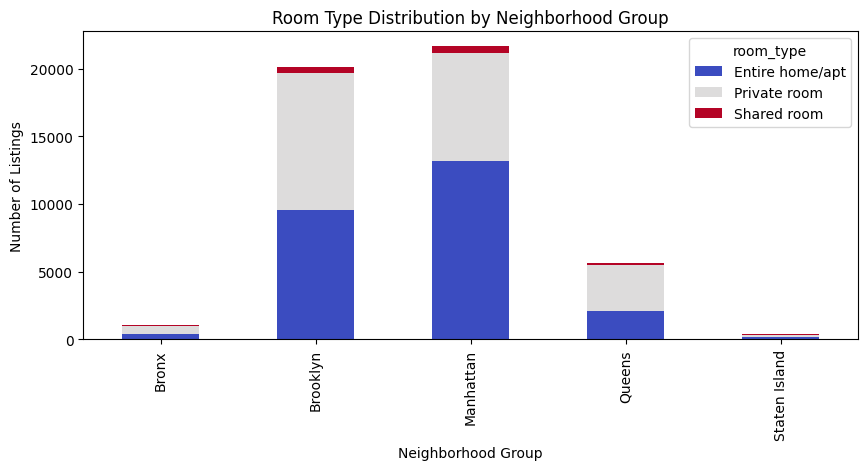

In [98]:
# Chart - 11 visualization code
x = pd.read_sql_query('''
SELECT neighbourhood_group, room_type, COUNT(*) AS count
FROM Airbnb
GROUP BY neighbourhood_group, room_type;
''', conn)

x.pivot(index='neighbourhood_group', columns='room_type', values='count').plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.title('Room Type Distribution by Neighborhood Group')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the stacked bar chart because it helps compare the distribution of different room types across neighborhood groups in a clear and organized way. It shows both the total number of listings in each group and how different room types contribute to it. This makes it easy to see which areas have more shared rooms, private rooms, or entire homes, helping in better decision-making for hosts and travelers

##### 2. What is/are the insight(s) found from the chart?

From the chart, I found that some neighborhood groups like Brooklyn and manhattan have more entire homes/apartments, while others have a higher number of private rooms or shared rooms. This shows the preference of listings in different areas. For example, tourist-heavy areas might have more entire homes, while budget-friendly areas could have more private or shared rooms. This insight helps in understanding the market demand in different locations

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can help in making a positive business impact. By understanding which room types are more common in different neighborhood groups, hosts can make better decisions about what type of listing to offer. For example, if entire homes are more in demand in a certain area, new hosts can focus on providing such listings to attract more bookings. Similarly, if private rooms are popular in budget-friendly areas, it helps in targeting cost-conscious travelers.

#### Chart - 12:-Area Chart - Price Distribution Over Different Neighborhoods

In [101]:
newdf.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'review_year',
       'high_demand', 'days_since_last_review', 'stay_type', 'review_month',
       'review_quarter', 'total_listings'],
      dtype='object')

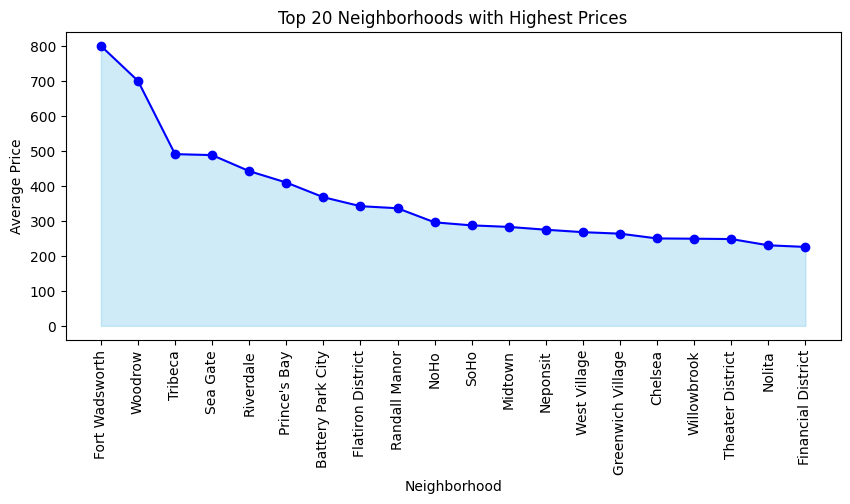

In [102]:
# Chart - 12 visualization code
x = pd.read_sql_query('''
SELECT neighbourhood, AVG(price) AS avg_price
FROM Airbnb
GROUP BY neighbourhood
ORDER BY avg_price DESC
LIMIT 20;
''', conn)

plt.fill_between(x['neighbourhood'], x['avg_price'], color="skyblue", alpha=0.4)
plt.plot(x['neighbourhood'], x['avg_price'], marker="o", color="blue")
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 20 Neighborhoods with Highest Prices')
plt.show()


##### 1. Why did you pick the specific chart?

I chose the area chart because it helps show how average prices vary across different neighborhoods in a clear and smooth way. The shaded area makes it easy to see which neighborhoods have higher prices compared to others. The line with markers highlights the exact values for better understanding. This chart is useful for identifying premium locations where prices are the highest.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that some neighborhoods have much higher average prices than others. This means certain areas are more expensive, likely due to higher demand, better location, or premium listings. The price gap between neighborhoods helps identify luxury areas and more affordable options for guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help in creating a positive business impact. Knowing which neighborhoods have the highest prices allows hosts to price their listings competitively and guests to choose stays based on their budget. It can also help investors target high-revenue areas for new listings.

#### Chart - 13:-Box Plot - Price Distribution by Room Type



<ipython-input-103-e1d5f5c8f6d2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x['room_type'], y=x['price'], palette='Set2')


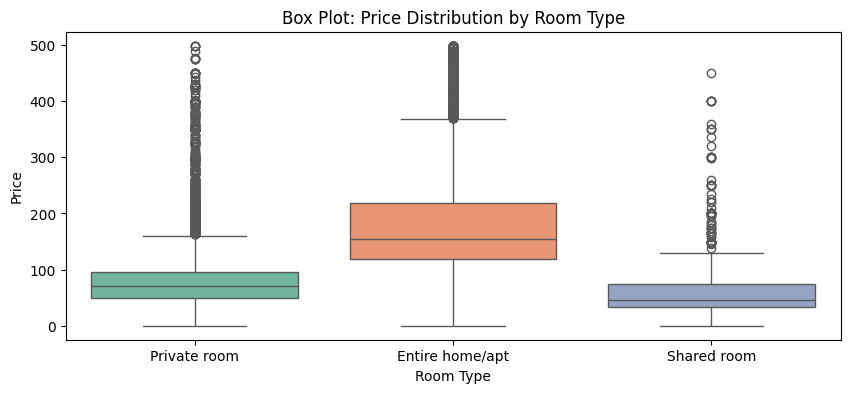

In [103]:
# Chart - 13 visualization code
import seaborn as sns

x = pd.read_sql_query('''
SELECT room_type, price
FROM Airbnb
WHERE price < 500;
''', conn)

sns.boxplot(x=x['room_type'], y=x['price'], palette='Set2')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Box Plot: Price Distribution by Room Type')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a box plot because it helps to visualize the distribution of prices for each room type. It shows the median price, range, and presence of outliers, making it easier to compare pricing patterns across different room types. This chart is useful for understanding price variations and extreme values in the dataset

##### 2. What is/are the insight(s) found from the chart?

From the box plot, we can see that different room types have varying price ranges. Some room types have higher median prices, while others are more affordable. The presence of outliers suggests that some properties have significantly higher prices than the majority. This helps in understanding which room types are generally more expensive or budget-friendly

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this box plot can help businesses set competitive pricing strategies for different room types. If a particular room type has high prices with fewer listings, it may indicate a niche market with demand for premium stays. On the other hand, if a room type has many outliers, it could mean pricing inconsistencies, which might confuse customers. Keeping prices within a reasonable range while maintaining quality can attract more bookings, leading to positive business growth. However, overpricing certain room types may discourage potential customers, leading to negative growth in bookings.

#### Chart - 14 - Correlation Heatmap:- Correlation Between Price & Other Numeric Features

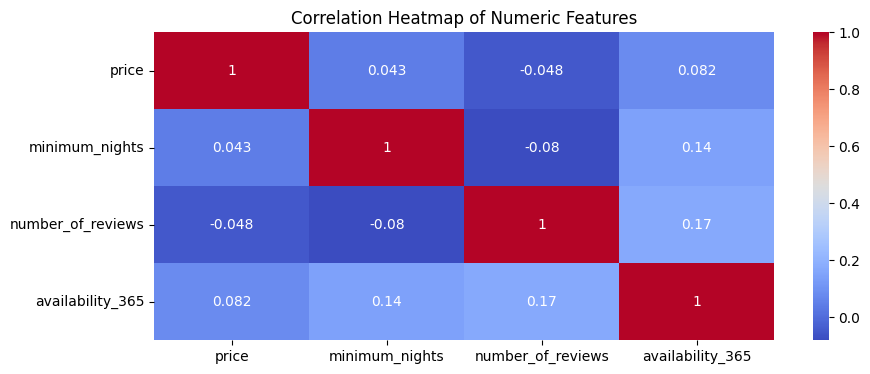

In [93]:
# Correlation Heatmap visualization code
import seaborn as sns

x = pd.read_sql_query('''
SELECT price, minimum_nights, number_of_reviews, availability_365
FROM Airbnb;
''', conn)

sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the correlation heatmap because it helps to visually understand the relationships between different numerical features in the dataset. It shows how strongly or weakly features like price, minimum nights, number of reviews, and availability are connected to each other. The color variations make it easy to spot patterns, such as positive or negative correlations, which can be useful for analysis and decision-making.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows how different factors like price, minimum nights, number of reviews, and availability are related to each other. the price has a almost zero correlation with minimum_nights,number_of_reviews,availability_365, it means that these features does not influences the price. For example, the availability is almost zero correlated with price, it could mean that higher-priced listings are booked less often. Similarly, the reviews and price have no strong correlation, it suggests that price does not directly affect the number of reviews a listing gets.

#### Chart - 15 - Pair Plot:- Relationships Between Key Features

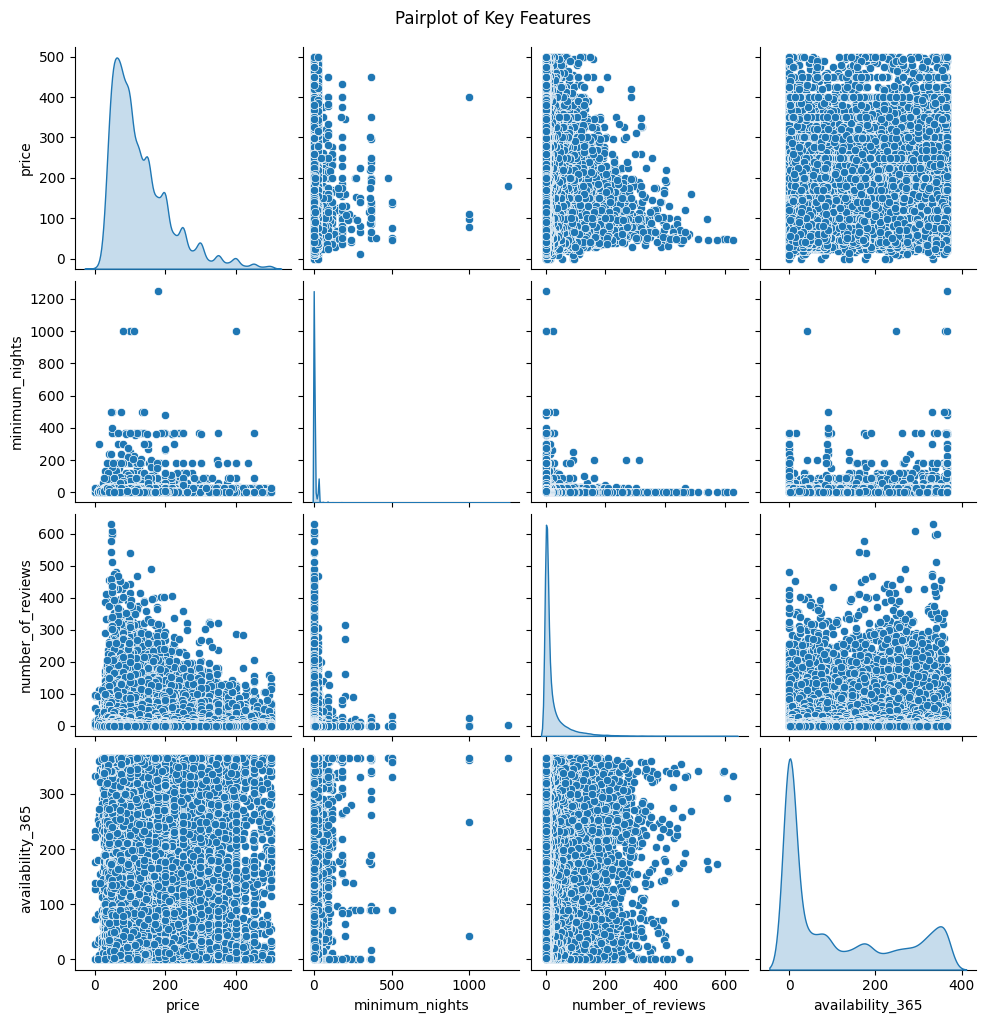

In [99]:
# Pair Plot visualization code
import seaborn as sns

x = pd.read_sql_query('''
SELECT price, minimum_nights, number_of_reviews, availability_365
FROM Airbnb
WHERE price < 500;
''', conn)

sns.pairplot(x, diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

I chose the pair plot because it helps to visualize the relationships between multiple numeric features at once. It shows scatter plots for feature comparisons and density plots for individual distributions. This makes it easy to spot patterns, such as whether price increases with availability or if there are any clusters in the data.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows how different features like price, minimum nights, number of reviews, and availability relate to each other. We can see if there is any clear trend or correlation between them. For example, if higher prices are linked to fewer reviews or lower availability, it might indicate that expensive listings are booked less often. Also, the density plots help us understand how each feature is distributed

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**To help the client achieve their business objective, I suggest the following strategies based on the data insights:**



*   **Optimize Pricing Strategy–**  Adjust prices based on demand, location, and room type. Competitive pricing in high-demand areas can attract more customers.

* ** Improve Availability** – Listings with higher availability perform better. Encouraging hosts to increase availability can improve bookings and revenue.

*   **Enhance Customer Experience** – Listings with more reviews tend to have better engagement. Encouraging hosts to provide excellent service can lead to positive reviews and repeat bookings

*   **Target High-Demand Areas– **Focus marketing and promotions in neighborhoods with high-priced listings and frequent bookings to attract more guests.

* ** Diversify Room Types** – Since different room types have different pricing trends, providing a mix of entire homes, private rooms, and shared spaces can attract a wider audience.


*   **Seasonal Offers & Discounts** – Identify trends in bookings and offer special discounts during off-peak seasons to maintain occupancy rates.


By implementing these strategies, the business can increase revenue, attract more guests, and improve customer satisfaction, leading to long-term growth.







# **Conclusion**

The exploratory data analysis (EDA) of the Airbnb dataset provided valuable insights into pricing, availability, room types, neighborhood trends, and customer behavior. We observed that room type and location significantly impact price, with entire homes being the most expensive. Certain neighborhoods have higher demand and pricing, making them key focus areas for business growth.

We also found that higher availability and positive reviews help in attracting more guests, while competitive pricing can improve bookings. Understanding these patterns allows Airbnb hosts and business owners to optimize their listings, set better prices, and enhance customer experience.

Overall, these insights can help improve Airbnb’s market strategy, increase revenue, and enhance customer satisfaction, leading to a stronger business performance.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***